<a href="https://colab.research.google.com/github/bejoy1775/Puzzle8/blob/main/PA2_Bejoy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PA2 - Naive Bayes Classification

In this homework assignment, you will implement a simple Naive Bayes classifier and train/test it for predicting the new article types using the 20 newsgroup dataset. The objective is to classify documents into one of the 20 categories using a simple Naive Bayesian method.

The following code is partially done. You need to complete all the code blocks that start with the **TODO** mark. Save a copy of this notebook on your file space, and complete your notebook. **Submit the finished notebook that shows all the results to D2L.**



## Data Analysis
Let's fetch the dataset first. You can download it using a sci-kit learn dataset method as below.

In [455]:
from sklearn.datasets import fetch_20newsgroups

data_tr = fetch_20newsgroups(subset='train', shuffle=True, random_state=42)

Let's inspect what we have. `dir()` is a Python built-in function that lists all the names in the current local scope of the given object.

In [456]:
dir(data_tr)

['DESCR', 'data', 'filenames', 'target', 'target_names']

Let's print out the first three examples to see how each record looks like.

In [457]:
data_tr.data[:3]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 

In [458]:
data_tr.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

As you can see, `.data` contains all the textual data, and `.target` has the corresponding label (i.e., news category). We have 20 classes as above, and the target is the integer number corresponding to the names.

Let's plot a histogram with the target data to see its distribution.

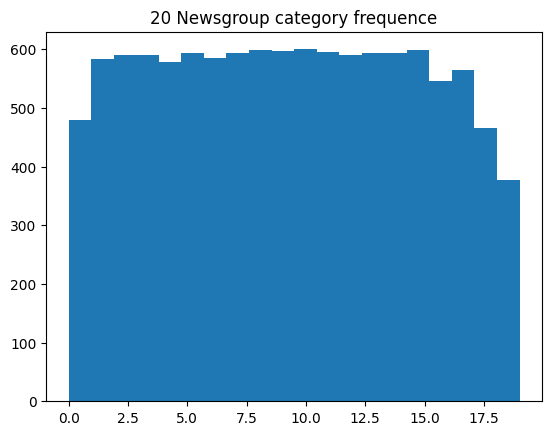

In [459]:
import matplotlib.pyplot as plt

plt.hist(data_tr.target, bins=len(data_tr.target_names))
plt.title("20 Newsgroup category frequence")
plt.show()

## Text preprocessing

From this section, you will complete the unfinished code to make it run as a NB classifier for the newgroup category prediction. First part is text preprocessing.

### Filtering of Stopwords and Tokenizing

You will remove stopwords from the raw texts. *Stopwords* are a set of most frequently used words in any language, such as 'a', 'you', 'I', and 'will'. These are most likely function words that are not useful information in document classification.

Next, the given texts will be tokenized; that is, to split a sentence into an array of words by whitespace. After that, we can compute the different probabilities over words.

So, you will write a simple text preprocessing function that should:
- convert a string to lowercase
- filter stopwords, and
- tokenize it simply by whitespace.

We can use the NLTK stopwords as below, which is a commonly used Python library for NLP:

In [460]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw_list = stopwords.words('english')
sw_list[:10]  # show some examples

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

**TODO -- Complete the following function; this function takes a string and returns a list of words in lowercase which are not in the stopwords list.**

In [461]:
import string

def text_prep(s):
  text = s.lower()
  tokenize_text = text.split()
  filtered_punc = [word.strip(string.punctuation) for word in tokenize_text]
  filtered_text = [x for x in filtered_punc if x not in sw_list]
  filter_empty = [x for x in filtered_text if len(x) > 2]

  return filter_empty


**TODO -- Apply the function `text_prep` on `data_tr.data` and append the outputs to `data_tr_prep`, which will be a list of documents where each document represented by a list of words.**

In [462]:
data_tr_prep = [text_prep(x) for x in data_tr.data]

In [463]:
data_tr_prep[0]

['lerxst@wam.umd.edu',
 "where's",
 'thing',
 'subject',
 'car',
 'nntp-posting-host',
 'rac3.wam.umd.edu',
 'organization',
 'university',
 'maryland',
 'college',
 'park',
 'lines',
 'wondering',
 'anyone',
 'could',
 'enlighten',
 'car',
 'saw',
 'day',
 '2-door',
 'sports',
 'car',
 'looked',
 'late',
 '60s',
 'early',
 '70s',
 'called',
 'bricklin',
 'doors',
 'really',
 'small',
 'addition',
 'front',
 'bumper',
 'separate',
 'rest',
 'body',
 'know',
 'anyone',
 'tellme',
 'model',
 'name',
 'engine',
 'specs',
 'years',
 'production',
 'car',
 'made',
 'history',
 'whatever',
 'info',
 'funky',
 'looking',
 'car',
 'please',
 'e-mail',
 'thanks',
 'brought',
 'neighborhood',
 'lerxst']

`data_tr_prep[0]` should print a list of words similar to the following list:
```
['from:',
 'lerxst@wam.umd.edu',
 "(where's",
 'thing)',
 'subject:',
 'car',
 'this!?',
 'nntp-posting-host:',
 'rac3.wam.umd.edu',
 'organization:',
 'university',
 'maryland,',
 ...
]
```

## Build a Vocabulary

Now we need to build a vocabulary which contains a fixed number of unique words. Only the words in the vocabulary will be used in the prediction process.

Let's set a reasonable size of vocabulary (i.e., V = 10000)

We will use a Python class `Counter` to count all the words appear in the entire *training* dataset. This counter is a dictionary of key-value pairs; in our case, the counter for building a vocabulary will be a dictionary of (word-frequency) pairs.


In [464]:
from collections import Counter, defaultdict
V = 144000
C = len(data_tr.target_names)
cnt_words = Counter()
for d in data_tr_prep:
  cnt_words.update(d)


`.most_common(n)` will return the n most frequent words in the counter, as below: Let's not worry about the punctuation words for now.

In [465]:
cnt_words.most_common(20)

[('subject', 12253),
 ('lines', 11820),
 ('organization', 11185),
 ('would', 8874),
 ('one', 8654),
 ('writes', 7836),
 ('article', 6754),
 ('people', 5833),
 ('like', 5760),
 ('university', 5544),
 ('know', 5116),
 ('get', 4943),
 ('nntp-posting-host', 4781),
 ('think', 4503),
 ('also', 4296),
 ('use', 4155),
 ('new', 3922),
 ('time', 3865),
 ('good', 3719),
 ("i'm", 3697)]

Build mappings between tokens (words) and their index numbers.

We create a data structure for the vocabulary of `V` words. You can use `cnt_words.most_common(V)` to get the top V most frequent words.

`tok2idx` should map a token to its index number and `idx2tok` should be a list of words in the frequency order.

In [466]:
idx2tok = list()
tok2idx = dict()

for i, (t, f) in enumerate(cnt_words.most_common(V)):
    idx2tok.append(t)
    tok2idx[t] = i

## Training a NB Classifier

Naive Bayes classifier is a simple conditional probability model based on applying Bayes' theorem with strong feature independence assumption. For more details, you should carefully read the lecture slides.

In essense, we need to build a classifier that computes the following:

$$argmax_{c\in C} P(c)\prod_{w\in d} P(w|c)$$

That is, for each class $c$, we compute the product of the class prior $P(c)$ and the conditional probabilities of words given the class $P(w|c)$ in a document $d$.

To do this, we need to estimate the prior class probabilities $P(c)$ and the conditional probabilities $P(w|c)$. We will use the normalized frequencies to estimate these probabilities.

For example, $P(c=rec.autos)$ can be estimated by the number of documents that belong to the class divided it by the total number of documents.

Likewise, $P(w=car|c=rec.autos)$ can be estimated by the fraction of the word $w$ appears among all words in documents of the class $c$.

To handle the zero probability issue, you should also apply the 'add-1' smoothing. See the lecture slides.

Now, the following Numpy arrays (i.e, `cond_prob` and `prior_prob`) will contain the estimated probabilities.

In [467]:
import numpy as np

cond_prob = np.zeros((V, C))
prior_prob = np.zeros((C))

**TODO -- Increment the counts while reading all the tokens in documents, and normalize them properly so that they can be use as the prior/conditional probabilities in a NB classifier.**

In [468]:
docCount = 0

wordCount = np.ones((V, C), dtype = int)
for d, c in zip(data_tr_prep, data_tr.target):
  docCount = docCount + 1
  prior_prob[c] = prior_prob[c] + 1
  for t in d:
    if t in tok2idx:
      wordCount[tok2idx[t],c] = wordCount[tok2idx[t],c] + 1
      # cond_prob[tok2idx[t],c] = cond_prob[tok2idx[t],c] + 1

prior_prob = np.divide(prior_prob, docCount)

for c in np.unique(data_tr.target):
  for t in tok2idx:
    if t in tok2idx:
      cond_prob[tok2idx[t],c] = (wordCount[tok2idx[t],c] + 1) / (cnt_words[t] + len(idx2tok))


In [469]:
prior_prob

array([0.04242531, 0.05161747, 0.05223617, 0.05214778, 0.05108715,
       0.05241294, 0.05170585, 0.05250133, 0.05285487, 0.05276648,
       0.05303164, 0.05258971, 0.05223617, 0.05250133, 0.05241294,
       0.05294326, 0.04825879, 0.04984974, 0.04109952, 0.03332155])

In [470]:
cond_prob[10]

array([0.00189115, 0.00154913, 0.00150219, 0.00166984, 0.0017369 ,
       0.00147536, 0.00050967, 0.00132783, 0.00145524, 0.00143512,
       0.00124735, 0.0019515 , 0.0016296 , 0.00194479, 0.00127418,
       0.00293731, 0.00168325, 0.00313179, 0.00256176, 0.00166313])

`prior_prob` should look something like this:

```
array([0.04242531, 0.05161747, 0.05223617, 0.05214778, 0.05108715,
       0.05241294, 0.05170585, 0.05250133, 0.05285487, 0.05276648,
       0.05303164, 0.05258971, 0.05223617, 0.05250133, 0.05241294,
       0.05294326, 0.04825879, 0.04984974, 0.04109952, 0.03332155])
```

`cond_prob[10]` should look something like this:

```
array([0.00802263, 0.00404768, 0.00520794, 0.00410638, 0.00516728,
       0.00250812, 0.00143359, 0.0081197 , 0.00944117, 0.00747272,
       0.00482113, 0.00474687, 0.0053405 , 0.00616861, 0.00579096,
       0.00451822, 0.00591574, 0.00497174, 0.00676319, 0.00629697])
```

## Inference

You will test your classifier with unseen examples (test dataset).

**TODO -- Apply `text_prep` on `data_ts` in the same way as you did earlier.**

In [471]:
data_ts = fetch_20newsgroups(subset='test', shuffle=True, random_state=42)
data_ts_prep = []
data_ts_prep = [text_prep(x) for x in data_ts.data]

In [472]:
len(data_ts_prep)

7532

Now, *make a prediction*.

For each test document, compute the "argmax" formula shown earlier. The argmax should tell you the class that maximizes the product of the prior and conditional probabilities.

You should apply log to the product for computational stability and less expansive computation. Taking log will convert multiplication to addition.

**TODO -- Complete the following codes for inference. You should completely understand the NB classifier example given in the 04-classification lecture slides. (Use the equations on page 31)**


In [473]:
import math
import numpy as np

pred = []

# TODO -- implement this for loop to make predictions


for d, c in zip(data_ts_prep, data_ts.target):
  p1 = -20000000
  for c_i in range(len(data_ts.target_names)):
    p2 = math.log(prior_prob[c_i])
    for t in d:
      if t in tok2idx:
        p2 = p2 + math.log(cond_prob[tok2idx[t], c_i])

    if p2 > p1:
      p1 = p2
      max_c = c_i

  pred.append(max_c)

In [474]:
len(pred)

7532


Once, you made all the predictions for the testing examples, you can run a evaluation metric for accuracy.

If everything is correct, you should get around 70-77% accuracy.


In [475]:
from sklearn.metrics import accuracy_score
accuracy_score(data_ts.target, pred)


0.7355284121083377

You can do more and achieve even better results. (> 80%)